There are a hell of a lot of options in the `PySRRegressor` class. I think part of the reason why that is has to do with telling the underlying Julia code what to do. So, here we are going to explore and understand them.

In [2]:
_SEARCH_SPACE_BINARY_OPERATORS = [
    "+", "-", "*", "/", "^"
]

_SEARCH_SPACE_UNARY_OPERATORS = [
   "exp", "log", "sqrt", "sin", "cos", "tan"
]

_SEARCH_SPACE_MAXIUMUM_COMPLEXITY = 20

_SEARCH_SPACE_MAXIMUM_DEPTH = None

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pysr import PySRRegressor

np.set_printoptions(precision = 3, suppress = True)

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [4]:
py_regressor_models = PySRRegressor(

    # === SEARCH SPACE ===

    # (1): Binary operators:
    binary_operators = _SEARCH_SPACE_BINARY_OPERATORS,

    # (2): Unary operators:
    unary_operators = _SEARCH_SPACE_UNARY_OPERATORS,

    # (3): Maximum complexity of chosen equation:
    maxsize = _SEARCH_SPACE_MAXIUMUM_COMPLEXITY,

    # (4): Maximum depth of a chosen equation:
    maxdepth = _SEARCH_SPACE_MAXIMUM_DEPTH,

    # === SEARCH SIZE ===

    # (1): Number of iterations for the algorithm:
    niterations = 40,

    # (2): The number of "populations" running:
    populations = 15,

    # (3): The size of each population:
    population_size = 33,

    # (4): Whatever the fuck this means:
    ncycles_per_iteration = 550,

    # === OBJECTIVE ===

    # (1): Option 1: Specify *Julia* code to compute elementwise loss:
    elementwise_loss = "loss(prediction, target) = (prediction - target)^2",

    # (2): Option 2: Code your own *Julia* loss:
    loss_function = None,

    # (3): Choose the "metric" to select the final function --- can be 'accuracy,' 'best', or 'score':
    model_selection = 'best',

    # (4): How much to penalize a given function if dim-analysis doesn't work:
    dimensional_constraint_penalty = 1000.0,

    # (5): Enable or disable a search for dimensionless constants:
    dimensionless_constants_only = False,

    # === COMPLEXITY ===

    # (1): Multiplicative factor that penalizes a complex function:
    parsimony = 0.0032,

    # (2): A complicated dictionary governing how complex a given operation can be:
    constraints = None,

    # (3): Another dictionary that enforces the number of times an operator may be nested:
    nested_constraints = None,

    # (4): Another dictionary that limits the complexity per operator:
    complexity_of_operators = None)

We will now break discussing `PyRegressor` and attempt to understand several examples.

## Section 1: Simple Search

In [5]:
x_data = 2 * np.random.randn(100, 5)
y_data = 2 * np.cos(x_data[:, 3]) + x_data[:, 0] ** 2 - 2

In [6]:
with np.printoptions(precision = 2, suppress = True):
    print(x_data)
    print(y_data)

[[-0.49 -0.82 -1.76 -0.03 -0.27]
 [ 0.05 -1.96  2.17 -1.81 -0.49]
 [-0.42  2.08 -1.99  2.19  0.75]
 [ 2.29 -0.18 -2.7   0.91 -1.68]
 [-2.52 -2.53 -3.21 -2.6   0.19]
 [ 1.81  0.48 -2.69 -2.6   3.7 ]
 [ 1.18  0.28 -1.95  2.63  2.82]
 [-0.74  0.65 -3.63  2.9   0.25]
 [-0.14 -2.25 -0.27 -0.72  0.65]
 [ 0.82 -3.14  0.18  0.62  2.62]
 [ 0.57  2.4   2.31 -0.6  -0.19]
 [-1.61  0.32 -0.1  -2.25  0.95]
 [ 2.22  0.96  0.64  1.01  2.84]
 [-0.34 -3.58  1.27 -0.1  -1.36]
 [ 1.75  0.43  1.97  0.58  2.33]
 [-0.9   2.08 -0.5   0.26  0.18]
 [ 0.56 -3.39  0.63  1.81 -1.24]
 [ 0.89  1.73 -0.23  0.46  0.37]
 [ 0.03 -0.41 -0.12  0.19  3.06]
 [-2.24  1.35 -0.44  1.38 -1.76]
 [-0.57  0.8  -2.55 -2.17 -0.01]
 [-2.43 -0.08  0.13 -0.95  2.9 ]
 [ 1.77  4.45 -3.47  0.66 -2.1 ]
 [ 1.74  1.25 -0.75 -2.29  1.64]
 [ 4.24 -0.87  0.86  0.72  1.97]
 [-1.   -0.7   0.42  0.71 -1.41]
 [ 2.89  0.03 -0.83  2.27  1.45]
 [-0.25  0.78  1.11 -0.13 -2.02]
 [-0.55  2.87 -3.05  0.82  1.15]
 [-0.92  1.59  1.09 -1.46 -1.69]
 [-4.82  2

In [7]:
print(len(x_data))
print(len(y_data))

100
100


As it should be.

In [8]:
model = PySRRegressor(
    niterations = 40,
    binary_operators = ["+", "*"],
    unary_operators = [
        "cos",
        "exp",
        "sin",
    ],
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",)
model.fit(x_data, y_data)

Compiling Julia backend...


c:\Python310\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 2.090e+05
Head worker occupation: 24.2%
Progress: 439 / 600 total iterations (73.167%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           4.023e+01  1.594e+01  y = 1.1746
2           3.895e+01  3.219e-02  y = exp(0.83447)
3           3.815e+01  2.079e-02  y = 2.057 + x₄
4           2.878e+01  2.818e-01  y = exp(-0.563 * x₀)
5           1.839e+00  2.751e+00  y = -1.7396 + (x₀ * x₀)
7           1.746e+00  2.605e-02  y = ((x₀ + 0.15198) * x₀) + -1.7429
8           4.597e-01  1.334e+00  y = ((x₀ * x₀) + -1.8699) + cos(x₃)
9           3.536e-01  2.626e-01  y = (-3.1398 + (x₀ * x₀)) + exp(cos(x₃))
10          2.112e-13  1.594e+01  y = (-2 + (x₀ * x₀)) + (2 * cos(x₃))
11          1.447e-13  3.779e-01  y = ((cos(x₃) + -2) + (x₀ * x₀)) + cos(x₃)
---------------------------------------------------------------------------------------------------
P

PySRRegressor.equations_ = [
	   pick      score                                  equation          loss  \
	0         0.000000                                 1.1745878  4.022541e+01   
	1         0.032195                            exp(0.8344714)  3.895098e+01   
	2         2.080268                                   x0 * x0  4.864848e+00   
	3         0.486442                     -1.739612 + (x0 * x0)  1.838872e+00   
	4         0.026051     -1.7429001 + ((x0 + 0.15195929) * x0)  1.745515e+00   
	5         1.334191        ((x0 * x0) + -1.8698939) + cos(x3)  4.597180e-01   
	6         0.262581   (-3.1397583 + (x0 * x0)) + exp(cos(x3))  3.535525e-01   
	7  >>>>  28.146434      (-2.0 + (x0 * x0)) + (2.0 * cos(x3))  2.111607e-13   
	8         0.377900  ((cos(x3) + -2.0) + (x0 * x0)) + cos(x3)  1.447083e-13   
	
	   complexity  
	0           1  
	1           2  
	2           3  
	3           5  
	4           7  
	5           8  
	6           9  
	7          10  
	8          11  
]

In [9]:
model.sympy()

x0*x0 + 2.0*cos(x3) - 2.0

I don't get what this means at all. Are there multiple variables here? Let's do a really simple example so we know what is happening.

First of all, what does `np.random.randn(100, 3)` actually do? I read the documentation, but that didn't make much sense. So, let's do an experiment.

In [10]:
np.random.randn(1, 1)

array([[0.289]])

In [11]:
np.random.randn(1, 1)[0]

array([0.621])

In [12]:
np.random.randn(2, 1)

array([[0.459],
       [0.153]])

In [13]:
np.random.randn(2, 2)

array([[ 0.158,  0.089],
       [-1.077, -0.756]])

Now, I think I get what it is doing a little bit more. Now, let's try to understand the strange slicing we saw in the baby example above.

In [14]:
test_array_1 = np.random.randn(2, 2)
test_array_1

array([[-1.7  ,  0.058],
       [ 0.738, -1.724]])

In [15]:
test_array_1[:, 1]

array([ 0.058, -1.724])

My conclusion is that the example wants to demonstrate symbolic regression on a multivariable function, and that is why the slicing is performed. I don't understand for the life of me why five columns are added when only the first and fourth are used.

Anyway, if this conclusion is correct, then we should be able to fit a bunch of easy, one-dimensional functions.

## Section 1.2: Simple Function 1

Let's make a simple function and see if PySR can get it. We will try a line:

$$y = 3.8 x - 5.2$$

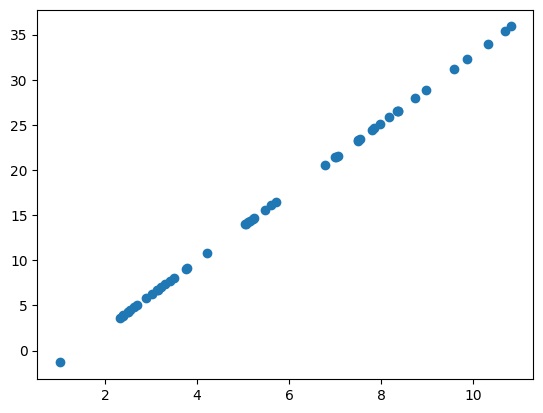

In [16]:
x_data_section_1_2 = np.array([10 * np.random.random() + 1 for i in range(0, 50)])
y_data_section_1_2 = 3.8 * x_data_section_1_2 - 5.2
plt.scatter(x_data_section_1_2, y_data_section_1_2)

In [17]:
print(len(x_data_section_1_2))
print(len(y_data_section_1_2))

50
50


In [18]:
with np.printoptions(precision = 2, suppress = True):
    print(x_data_section_1_2)
    print(y_data_section_1_2)

[ 7.01  6.79  2.39  5.23  7.79  8.36  3.14  9.59  5.61  8.17  9.86  4.23
 10.31  8.97  5.11 10.82  5.47  2.39  2.9   7.    7.97  7.49  2.55  5.71
  3.15  8.74  3.75  7.05  3.79  3.41  3.03  5.21  8.36  3.21  5.05  2.32
  2.63  1.02 10.7   7.53  7.85  5.16  5.05  2.5   7.51  8.35  3.49  2.5
  2.69  3.31]
[21.46 20.59  3.88 14.69 24.42 26.59  6.72 31.24 16.12 25.85 32.27 10.86
 33.99 28.89 14.2  35.9  15.58  3.9   5.82 21.4  25.1  23.26  4.51 16.48
  6.75 28.    9.05 21.61  9.2   7.75  6.3  14.61 26.56  7.   13.97  3.62
  4.79 -1.32 35.44 23.41 24.65 14.39 14.01  4.29 23.32 26.55  8.07  4.31
  5.02  7.38]


In [19]:
with np.printoptions(precision = 2, suppress = True):
    print(x_data_section_1_2.reshape(-1, 1))

[[ 7.01]
 [ 6.79]
 [ 2.39]
 [ 5.23]
 [ 7.79]
 [ 8.36]
 [ 3.14]
 [ 9.59]
 [ 5.61]
 [ 8.17]
 [ 9.86]
 [ 4.23]
 [10.31]
 [ 8.97]
 [ 5.11]
 [10.82]
 [ 5.47]
 [ 2.39]
 [ 2.9 ]
 [ 7.  ]
 [ 7.97]
 [ 7.49]
 [ 2.55]
 [ 5.71]
 [ 3.15]
 [ 8.74]
 [ 3.75]
 [ 7.05]
 [ 3.79]
 [ 3.41]
 [ 3.03]
 [ 5.21]
 [ 8.36]
 [ 3.21]
 [ 5.05]
 [ 2.32]
 [ 2.63]
 [ 1.02]
 [10.7 ]
 [ 7.53]
 [ 7.85]
 [ 5.16]
 [ 5.05]
 [ 2.5 ]
 [ 7.51]
 [ 8.35]
 [ 3.49]
 [ 2.5 ]
 [ 2.69]
 [ 3.31]]


We will now define the PySR Regressor.

In [20]:
model_section_1_2 = PySRRegressor(
    niterations = 40,
    binary_operators = ["+", "*"],
    unary_operators = [
        "cos",
        "exp",
        "sin",
    ],
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",)
model_section_1_2.fit(x_data_section_1_2, y_data_section_1_2)

c:\Python310\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 7.015  6.788  2.391  5.235  7.794  8.365  3.137  9.589  5.61   8.171
  9.86   4.226 10.312  8.972  5.106 10.816  5.47   2.394  2.899  7.001
  7.974  7.49   2.554  5.706  3.146  8.736  3.751  7.055  3.789  3.407
  3.027  5.212  8.359  3.211  5.045  2.322  2.63   1.021 10.696  7.53
  7.854  5.156  5.055  2.498  7.505  8.354  3.491  2.503  2.689  3.309].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

What kind of bogus error is this?

In [21]:
x_data_section_1_2.reshape(-1, 1)

array([[ 7.015],
       [ 6.788],
       [ 2.391],
       [ 5.235],
       [ 7.794],
       [ 8.365],
       [ 3.137],
       [ 9.589],
       [ 5.61 ],
       [ 8.171],
       [ 9.86 ],
       [ 4.226],
       [10.312],
       [ 8.972],
       [ 5.106],
       [10.816],
       [ 5.47 ],
       [ 2.394],
       [ 2.899],
       [ 7.001],
       [ 7.974],
       [ 7.49 ],
       [ 2.554],
       [ 5.706],
       [ 3.146],
       [ 8.736],
       [ 3.751],
       [ 7.055],
       [ 3.789],
       [ 3.407],
       [ 3.027],
       [ 5.212],
       [ 8.359],
       [ 3.211],
       [ 5.045],
       [ 2.322],
       [ 2.63 ],
       [ 1.021],
       [10.696],
       [ 7.53 ],
       [ 7.854],
       [ 5.156],
       [ 5.055],
       [ 2.498],
       [ 7.505],
       [ 8.354],
       [ 3.491],
       [ 2.503],
       [ 2.689],
       [ 3.309]])

So, it just likes it to be fed in in a certain way. Alright.

In [22]:
model_section_1_2 = PySRRegressor(
    niterations = 40,
    binary_operators = ["+", "*"],
    unary_operators = [
        "cos",
        "exp",
        "sin",
    ],
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",)
model_section_1_2.fit(x_data_section_1_2.reshape(-1, 1), y_data_section_1_2)

c:\Python310\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	   pick      score                       equation          loss  complexity
	0         0.000000                 exp(0.6970441)  3.033673e+02           2
	1         4.135957                  3.043987 * x0  4.850040e+00           3
	2  >>>>  14.595773  -5.2000003 + (3.8000002 * x0)  1.018634e-12           5
]

In [23]:
model_section_1_2.sympy()

3.8000002*x0 - 5.2000003

It got it pretty accurately!

Now, we also want to be able to plot the prediction and so on.

In [24]:
model_section_1_2.predict(x_data_section_1_2.reshape(-1, 1))

array([21.456, 20.593,  3.884, 14.692, 24.417, 26.586,  6.721, 31.237,
       16.119, 25.85 , 32.269, 10.859, 33.986, 28.894, 14.202, 35.901,
       15.585,  3.897,  5.818, 21.402, 25.1  , 23.262,  4.506, 16.482,
        6.753, 27.997,  9.055, 21.608,  9.197,  7.747,  6.303, 14.606,
       26.564,  7.003, 13.972,  3.622,  4.793, -1.319, 35.444, 23.415,
       24.645, 14.392, 14.007,  4.293, 23.321, 26.547,  8.065,  4.312,
        5.017,  7.376])

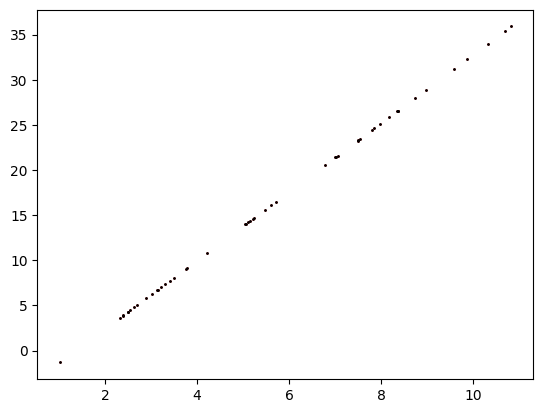

In [25]:
plt.scatter(
    x_data_section_1_2.reshape(-1, 1),
    model_section_1_2.predict(x_data_section_1_2.reshape(-1, 1)),
    color = 'red',
    s = 0.5)

plt.scatter(
    x_data_section_1_2.reshape(-1, 1),
    y_data_section_1_2,
    color = 'black',
    s = 1)

## Section 1.3: A Quadratic Function

This function closely resembles *one part* of the one we want to figure out eventually. It looks like this:

$$(a x^{2} + b x) + f.$$

For the following section, we will use these parameters:

$a = -4.41$, $b = 1.68$, $f = -1.37$.

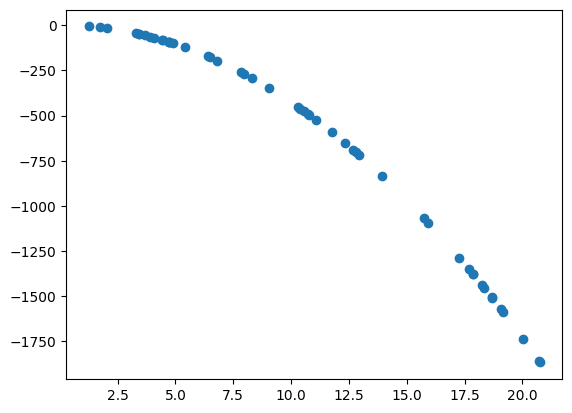

In [26]:
x_data_section_1_3 = np.array([20 * np.random.random() + 1 for i in range(0, 50)])
y_data_section_1_3 = (-4.41 * x_data_section_1_3**2 + 1.68 * x_data_section_1_3) - 1.37
plt.scatter(x_data_section_1_3, y_data_section_1_3)

In [27]:
model_section_1_3 = PySRRegressor(
    niterations = 40,
    binary_operators = ["+", "*", "-", "/"],
    unary_operators = [
        "cos",
        "exp",
        "sin",
    ],
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",)
model_section_1_3.fit(x_data_section_1_3.reshape(-1, 1), y_data_section_1_3)

c:\Python310\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                    sin(-1.7302104)   
	1        2.669477                                    x0 * -69.240364   
	2        3.946317                              (-4.317312 * x0) * x0   
	3        2.479875              x0 * ((x0 - 0.32011274) * -4.3991623)   
	4        6.675468  -1.3713629 + (x0 * (-4.4100103 * (x0 + -0.3810...   
	5  >>>>  1.776221  ((x0 * ((-4.4100018 * x0) + 1.6800313)) - 1.65...   
	6        0.172079  (((x0 - 0.38095027) * (x0 * -4.41)) + cos(-0.8...   
	
	           loss  complexity  
	0  7.631899e+05           2  
	1  5.288026e+04           3  
	2  1.974997e+01           5  
	3  1.385399e-01           7  
	4  2.204638e-07           9  
	5  6.317300e-09          11  
	6  5.318616e-09          12  
]

In [28]:
model_section_1_3.sympy()

x0*(1.6800313 - 4.4100018*x0) - 1*1.6522729 + 0.2821725

In [29]:
3.5916748*0.3814533

1.3700562049868399

## Section 1.4: The Other Part

This function closely resembles the *other part* of the one we want to figure out eventually. It looks like this:

$$e^{c x^{2} + d x + e} + f.$$

For the following section, we will use these parameters:

$c = -9.14$, $d = -3.57$, $e = 1.54$, $f = -1.37$.

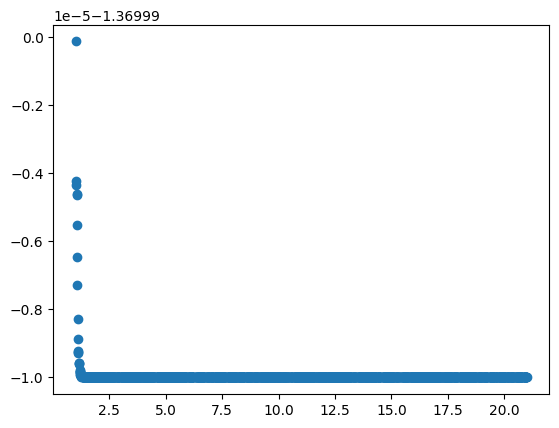

In [30]:
x_data_section_1_4 = np.array([20 * np.random.random() + 1 for i in range(0, 2000)])
y_data_section_1_4 = np.exp(-9.14 * x_data_section_1_4**2 - 3.57 * x_data_section_1_4 + 1.54) - 1.37
plt.scatter(x_data_section_1_4, y_data_section_1_4)

In [31]:
model_section_1_4 = PySRRegressor(
    niterations = 40,
    binary_operators = ["+", "*", "-", "/"],
    unary_operators = [
        "cos",
        "exp",
        "sin",
    ],
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",)
model_section_1_4.fit(x_data_section_1_4.reshape(-1, 1), y_data_section_1_4)

c:\Python310\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 4.680e+04
Head worker occupation: 15.1%
Progress: 105 / 600 total iterations (17.500%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           1.522e-01  7.971e+00  y = sin(-1.37)
3           1.334e-13  1.594e+01  y = -1.3353 + -0.034719
12          1.196e-13  1.219e-02  y = (-1.3212 - 0.048772) + ((3.6349e-06 * cos(0.62724)) / (3.6...
                                  237 * x₀))
---------------------------------------------------------------------------------------------------
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 5.470e+04
Head worker occupation: 25.7%
Progress: 241 / 600 total iterations (40.167%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.822e+02  1.594e+01  y = x₀

PySRRegressor.equations_ = [
	   pick      score                                           equation  \
	0         0.000000                                                 x0   
	1         7.193427                                     sin(-1.570753)   
	2  >>>>  27.656673                          -1.3352814 + -0.034718655   
	3         0.012188  (-1.3212286 - 0.048771515) + ((3.6348906e-6 * ...   
	
	           loss  complexity  
	0  1.821666e+02           1  
	1  1.369000e-01           2  
	2  1.334328e-13           3  
	3  1.195701e-13          12  
]

In [32]:
model_section_1_4.sympy()

-1.3352814 - 0.034718655

In [33]:
# First pass:
-1.3543898-0.015610022

-1.369999822

In [34]:
# Second pass:
-1.3877121+0.01771216

-1.3699999399999998

That's about the same value as $f$ above. So, that checks out.

## Section 1.5: A First-Pass at a Multivariate Function

This function actually appears in the following paper:

[A Bayesian machine scientist to aid in the solution of
challenging scientific problems](https://www.science.org/doi/epdf/10.1126/sciadv.aav6971)

The function is, in their notation:

$$f(x_{1}, x_{2}) = y = \frac{x_{1} (\theta_{1} + x_{2}) \cos(x_{1})}{\theta_{2} \log(\theta_{2})}$$

with the parameter values $\theta_{1} = -1.19$ and $\theta_{2} = 0.29$. They pulled from $[-2, 2 ]^{2}$ with $N = 400$ points and an error of $\epsilon \sim \mathcal{N}(0, 1)$.

Text(0.5, 0, 'Z Label')

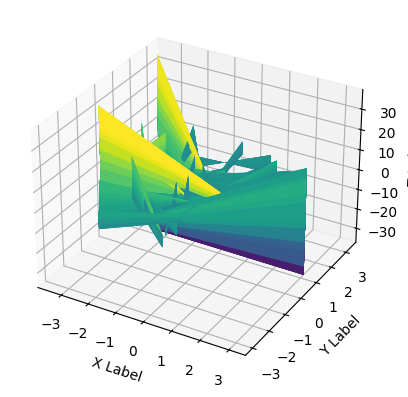

In [47]:
x_1_data_section_1_5 = np.random.uniform(low = -2.0, high = 2.0, size = 50) + np.random.normal(loc = 0, scale = 1, size = 50)
x_2_data_section_1_5 = np.random.uniform(low = -2.0, high = 2.0, size = 50) + np.random.normal(loc = 0, scale = 1, size = 50)

x_1_grid, x_2_grid = np.meshgrid(x_1_data_section_1_5, x_2_data_section_1_5)

theta_one = -1.19
theta_two = 0.29

y_data_selection_1_5 = x_1_grid * (theta_one + x_2_grid) * np.cos(x_1_grid) / (theta_two * np.log(theta_two))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(
    x_1_data_section_1_5,
    x_2_data_section_1_5,
    y_data_selection_1_5,
    cmap = "viridis",
    # rstride = 1,
    # cstride = 1,
    # edgecolor = "black",  # set edgecolours
    # linewidth = 0.1,      # set line width
)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

## Section 1.6: A Different Multivariate Function

This function closely resembles the *other part* of the one we want to figure out eventually. It looks like this:

$$f(x, y) = (a x^{2} + b x) e^{c y^{2} + d y^{2} + e} + f.$$

For the following section, we will use these parameters:

$a = -4.41$, $b = 1.68$, $c = -9.14$, $d = -3.57$, $e = 1.54$, $f = -1.37$.

Text(0.5, 0, 'Z Label')

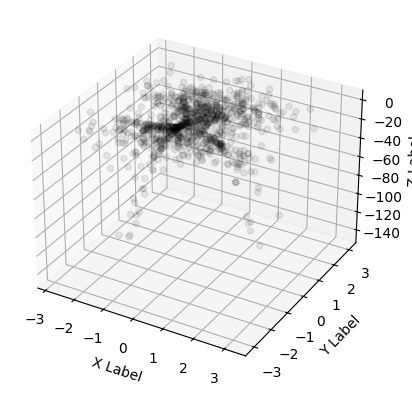

In [37]:
x_data_section_1_5 = np.random.randn(1000, 2)
z_data_section_1_5 = (-4.41 * x_data_section_1_5[:, 0]**2 + 1.68 * x_data_section_1_5[:, 0]) * np.exp(-9.14 * x_data_section_1_5[:, 1]**2 - 3.57 * x_data_section_1_5[:, 1] + 1.54) - 1.37


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x_data_section_1_5[:, 0], x_data_section_1_5[:, 1], z_data_section_1_5, color = 'black', alpha = 0.08)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [38]:
with np.printoptions(precision = 2, suppress = True):
    print(x_data_section_1_5.reshape(-1, 1))

[[-0.55]
 [ 1.19]
 [-0.21]
 ...
 [-2.96]
 [ 1.39]
 [ 1.33]]


In [39]:
model_section_1_5 = PySRRegressor(
    niterations = 100,
    binary_operators = ["+", "*", "-", "/"],
    unary_operators = [
        "exp",
    ],
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",)
model_section_1_5.fit(x_data_section_1_5, z_data_section_1_5)

c:\Python310\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.160e+05
Head worker occupation: 28.4%
Progress: 253 / 1500 total iterations (16.867%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           2.949e+02  1.594e+01  y = -7.5175
3           2.904e+02  7.785e-03  y = x₀ - 7.4868
4           2.692e+02  7.581e-02  y = -3.398 / exp(x₀)
5           2.645e+02  1.749e-02  y = -3.7434 * (x₀ * x₀)
6           2.639e+02  2.089e-03  y = (-3.5315 / exp(x₀)) - x₀
7           2.476e+02  6.403e-02  y = 5.3169 * ((0.63256 - x₀) * x₀)
9           2.447e+02  5.939e-03  y = (5.3169 * (x₀ * (0.63256 - x₀))) + -1.2831
11          2.408e+02  8.035e-03  y = -1.9458 + ((x₁ * x₁) - (x₀ * (x₀ / 0.20155)))
12          1.442e+02  5.129e-01  y = x₀ - (x₀ * (x₀ * exp(2.5472 - (x₁ * x₁))))
13          1.313e+02  9.360e-02  y = -3.1504 * (x₀ * (x₀ * exp(2.5288 - exp(x₁ * x₁))))
14          1.094e+02  1.823e-01  y = x₀ - ((

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          -7.517667   
	1         0.007785                                     x0 - 7.4868045   
	2         0.075807                                -3.397989 / exp(x0)   
	3         0.055703                             -5.8238535 * (x0 * x0)   
	4         0.015253                5.4979753 * ((0.4804082 - x0) * x0)   
	5         0.044591               (-5.8238535 + (x1 * x1)) * (x0 * x0)   
	6         0.024182  (-5.8238535 + (x1 * x1)) * ((x0 * x0) - -0.850...   
	7         0.400665      x0 - (x0 * (x0 * exp(2.5472496 - (x1 * x1))))   
	8         0.231629  x0 - ((x0 * exp(exp(1.0576437 - (x1 * x1)))) *...   
	9         0.099347  x0 - ((x0 * exp(2.9465537 - (x1 * (x1 * 3.7749...   
	10        0.405410  x0 - ((exp(exp(1.0576437 - (x1 * (x1 - -0.4582...   
	11        1.508700  x0 - (x0 * (exp(3.0909908 - (x1 * ((9.208126 *...   
	12        1.789736  -1.3338823 - ((x0 - 0.41024044) * (x0 * exp(3....   
	13  >>>>  5.463070  (-0.2197828 - (x0 * ((-0.38103187 + x0) * exp(...   
	
	          loss  complexity  
	0   294.917900           1  
	1   290.361360           3  
	2   269.163570           4  
	3   254.580340           5  
	4   246.931200           7  
	5   225.863020           9  
	6   215.199370          11  
	7   144.156520          12  
	8   114.350784          13  
	9   103.536440          14  
	10   69.028080          15  
	11   15.268831          16  
	12    0.425855          18  
	13    0.000008          20  
]

In [ ]:
model_section_1_5.sympy()

-exp(x0) - 12.69023*exp(-x0 - x1*(x1 + 0.3690661)/0.1472638)

It's not entirely clear what is happening here. I think the thing is close, but we need to do some algebra.

## Section 8: Complex Numbers

Supposedly, PySR can get complex-valued functions too. Let's try this out. 

In [ ]:
x_data = np.random.randn(100, 1) + 1j * np.random.randn(100, 1)
y_data = (1 + 2j) * np.cos(x_data[:, 0] * (0.5 - 0.2j))

model = PySRRegressor(
    binary_operators=["+", "-", "*"], unary_operators=["cos"], niterations=100,
    )

model.fit(x_data, y_data)

c:\Python310\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.770e+05
Head worker occupation: 24.5%
Progress: 377 / 1500 total iterations (25.133%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           4.956e+00  1.594e+01  y = 0.2011187f0 + 0.22265242f0im
2           9.795e-01  1.621e+00  y = cos(1.1808321f0 - 1.548395f0im)
4           8.148e-01  9.206e-02  y = cos(x₀) + (0.04249615f0 + 1.9707092f0im)
6           6.918e-09  7.937e+00  y = (1.0000228f0 + 2.0000572f0im) * cos((-0.49998015f0 + 0.199...
                                  99269f0im) * x₀)
8           2.403e-09  5.288e-01  y = cos(x₀ * ((-0.49477905f0 + 0.27785128f0im) * (0.9408245f0 ...
                                  + 0.124127656f0im))) * (1.0000185f0 + 2.0000312f0im)
14          1.148e-09  1.230e-01  y = cos(((((-0.21815549f0 + 0.23892754f0im) * cos(0.8813797f0 ...
                                  - 0.3695445f0im)) + cos(0.7802497

PySRRegressor.equations_ = [
	   pick      score                                           equation  \
	0         0.000000                        0.4722739e0 + 0.48936626e0j   
	1         1.332738                     cos(1.1808321e0 - 1.548395e0j)   
	2         0.092058           cos(x0) + (0.042493384e0 + 1.9707121e0j)   
	3        10.018470  cos((0.49999484e0 - 0.1999933e0j) * x0) * (1.0...   
	4         0.106656  ((1.0000125e0 + 2.0000005e0j) * cos((0.4999948...   
	5  >>>>   0.123130  cos((0.9656515e0 - 0.15518089e0j) * ((cos(cos(...   
	
	           loss  complexity  
	0  3.713841e+00           1  
	1  9.795411e-01           2  
	2  8.148213e-01           4  
	3  1.618563e-09           6  
	4  1.056449e-09          10  
	5  7.301706e-10          13  
]

In [ ]:
model.sympy()

(0.9999926 + 2.0000186*I)*cos(x0*(0.8600596 - 0.24357042*I)*(0.9656515 - 0.15518089*I)*cos(cos(cos(1.117639 - 0.1111241*I))))